# Reinforced learning, työllistyminen ja Suomen sosiaaliturva

Tässä tehdään laskelmat artikkelia varten. Käytössä on gym-ympäristö _unemployment-v1_ , johon on toteutettu yksityiskohtaisesti sosiaaliturvaa eri tiloissa.

In [1]:
# for Colab, install fin_benefits and unemployment-gym from Github
#!pip install -q git+https://github.com/ajtanskanen/benefits.git  
#!pip install -q git+https://github.com/ajtanskanen/econogym.git
#!pip install -q git+https://github.com/ajtanskanen/lifecycle-rl.git

# and then restart kernel
  
  # For a specific version:
#!pip install tensorflow==1.15
#!pip install stable-baselines==2.8
  
# restart kernel after running pip's

In [2]:
#import sys
#print(sys.path)
#sys.path.append('/usr/local/python3.7/site-packages')

Then load all modules and set parameters for simulations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.15 valittaa paljon)
# ei taida toimia piilottaminen
import warnings
warnings.filterwarnings('ignore')


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Populating the interactive namespace from numpy and matplotlib


In [2]:
# parameters for the simulation
# episode = 51 / 205 timesteps (1y/3m timestep)
pop_size=40_000 # size of the population to be simulated
size1=40_000_000 # number of timesteps in phase 1 training (callback not used)
size2=100_000_000 #0_000 # number of timesteps in phase 2 training (callback is used to save the best results)
size3=20_000_000 # number of timesteps in phase 1 training (callback not used) for policy changes
batch1=8 # size of minibatch in phase 1 as number of episodes
batch2=9_00  # size of minibatch in phase 1 as number of episodes
callback_minsteps=batch2 # how many episodes callback needs 
deterministic=True # use deterministic prediction (True) or probabilitic prediction (False)
mortality=False # include mortality in computations
randomness=True # include externally given, random state-transitions (parental leaves, disability, lay-offs) 
pinkslip=True # include lay-offs at 5 percent level each year
rlmodel='leaky_acktr' #'acktr' # use ACKTR algorithm # leaky_acktr?
twostage=False # ajataan kahdessa vaiheessa vai ei
if mortality:
    perusmalli_start='best/v2_malli_base_dev'
    perusmalli='best/v2_malli_base_dev'
    perusresults='results/v2_malli_base_dev_stoch'
    prefmalli='best/v2_malli_perus_prefnoise'
    prefresults='results/v2_perus_results_prefnoise'
else:
    perusmalli_start='best/v2_malli_baseline2_nomort'
    perusmalli='best/v2_malli_base_nomort'
    perusresults='results/v2_malli_base_nomort'
    baseline_results='results/v2_malli_baseline_nomort'
    prefmalli='best/v2_malli_perus_prefnoise_nomort'
    prefresults='results/v2_perus_results_prefnoise_nomort'
    
tva_savefile='results/v2_tvaresults'
    
debug=False # jos True, niin ajetaan vain yhdellä prosessilla. Nopeampi debugata.
plotdebug=False # tulostetaanko rivi riviltä mitä tapahtuu

year=2018

# Nykymalli 

Lasketaan työllisyysasteet nykymallissa.

In [5]:
cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug,year=year)
cc1.run_results(debug=debug,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=False,predict=True,batch1=batch1,batch2=batch2,
                save=perusmalli_start,plot=False,cont=True,start_from=perusmalli_start,results=perusresults,
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage,
                learning_rate=0.25,learning_schedule='linear',log_interval=1000)

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 18
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_kesto500 500
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True
perustulo False

sigma_reduction True
plotdebug False

version 2
simulate
simulating  best/v2_malli_baseline2_nomort
predicting...




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








Widget Javascript not detected.  It may not be installed or enabled properly.


No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 18
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_kesto500 500
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True
perustulo False

sigma_reduction True
plotdebug False

version 2


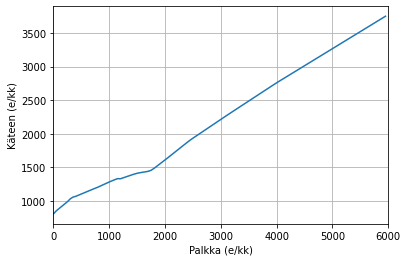

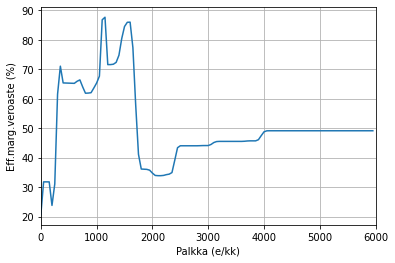

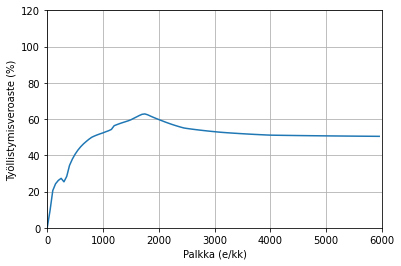

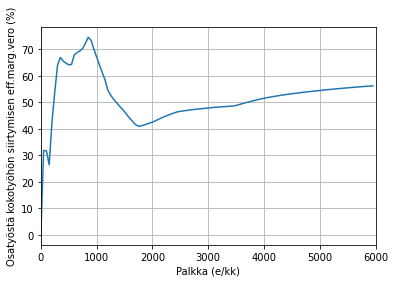

In [4]:
cc1a=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug,year=year)
cc1a.comp_aggkannusteet(n=50,savefile=tva_savefile)
cc1a.plot_aggkannusteet(tva_savefile)

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 18
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_kesto500 500
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True
perustulo False

sigma_reduction True
plotdebug False

version 2
n_pop 40000
Ave reward 232.50737019511303
Rahavirrat skaalattuna väestötasolle
+----------------------+-----------------------+----------------------+----------------------+
|                      |                   e/v |              toteuma |                  ero |
|----------------------+-----------------------+----------------------+----------------------|
| tyotulosumma         |  94,306,095,029.40    | 89,134,200,000.00    |  5,171,895,029.40    |
| etuusmeno            |  43,966,526,910.73    | 39,279,916,450.00    |  4,686,610,460.73 

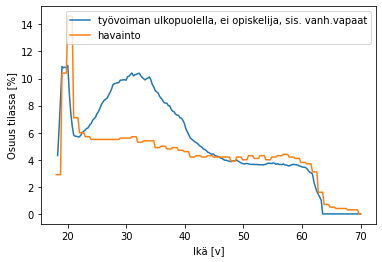

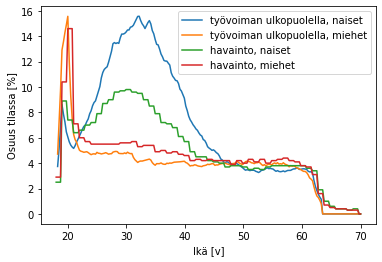

Keskikestot käytettyjen ansiosidonnaisten päivärahojen mukaan
+-------+----------+-----------+------------+-----------+-------------+
|       |   0-6 kk |   6-12 kk |   12-18 kk |   18-24kk |   yli 24 kk |
|-------+----------+-----------+------------+-----------+-------------|
| 20-29 |     0.54 |      0.32 |       0.13 |      0.01 |        0.00 |
| 30-39 |     0.47 |      0.30 |       0.19 |      0.03 |        0.00 |
| 40-49 |     0.47 |      0.31 |       0.19 |      0.02 |        0.00 |
| 50-59 |     0.42 |      0.29 |       0.23 |      0.06 |        0.00 |
| 60-65 |     0.25 |      0.18 |       0.17 |      0.14 |        0.26 |
+-------+----------+-----------+------------+-----------+-------------+
Keskikestot viimeisimmän työttömyysjakson mukaan


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


+-------+----------+-----------+------------+-----------+-------------+
|       |   0-6 kk |   6-12 kk |   12-18 kk |   18-24kk |   yli 24 kk |
|-------+----------+-----------+------------+-----------+-------------|
| 20-29 |     0.74 |      0.10 |       0.15 |      0.01 |        0.00 |
| 30-39 |     0.42 |      0.17 |       0.27 |      0.14 |        0.00 |
| 40-49 |     0.43 |      0.16 |       0.31 |      0.10 |        0.00 |
| 50-59 |     0.44 |      0.10 |       0.28 |      0.18 |        0.00 |
| 60-65 |     0.30 |      0.13 |       0.17 |      0.31 |        0.10 |
+-------+----------+-----------+------------+-----------+-------------+


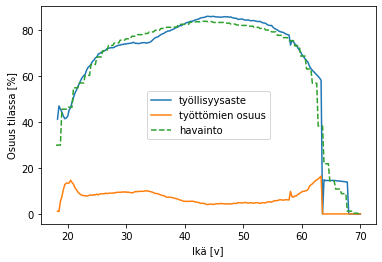

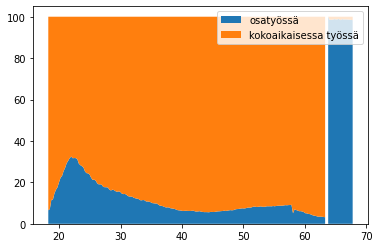

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


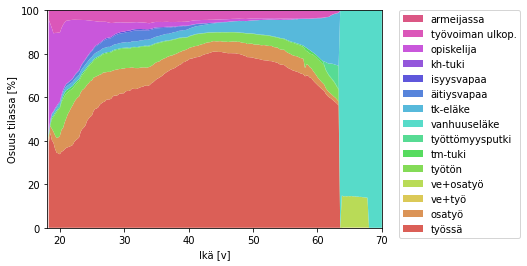

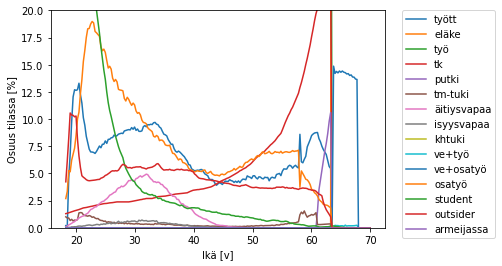

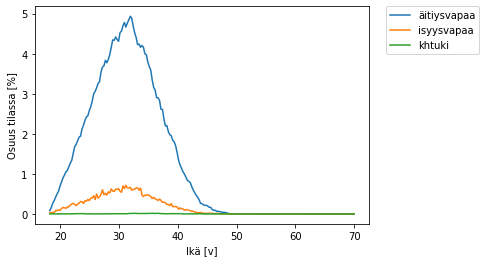

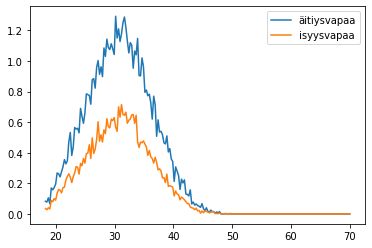

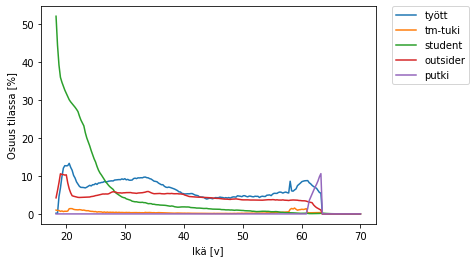

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


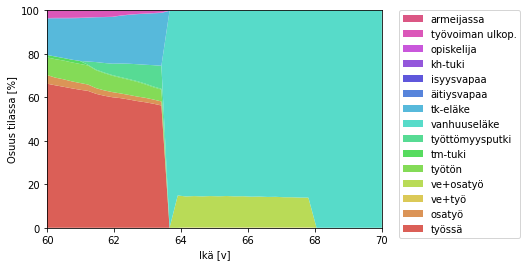

Lisäpäivillä on 11884 henkilöä


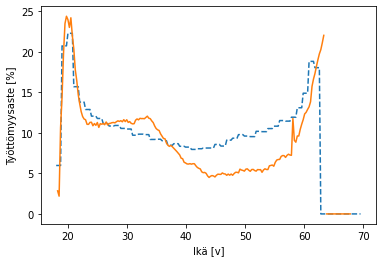

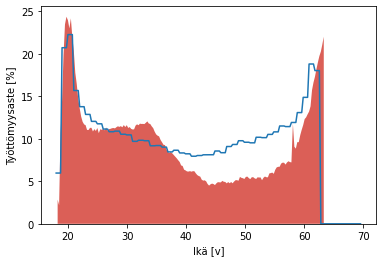

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


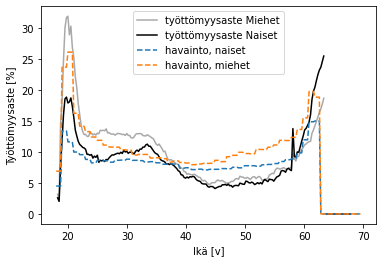

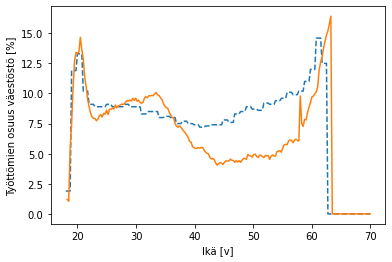

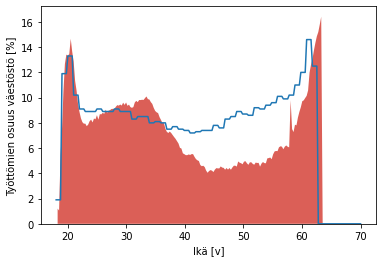

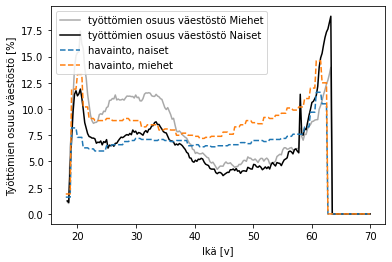

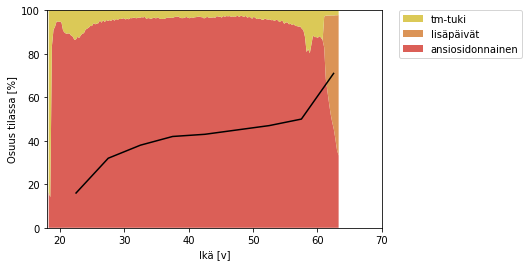

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


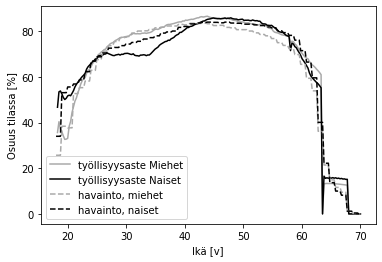

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


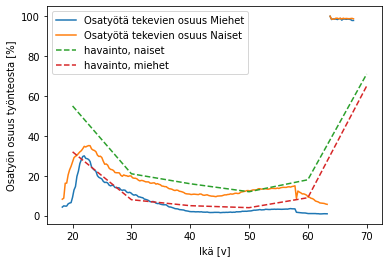

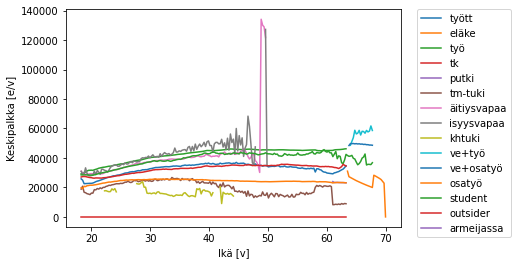

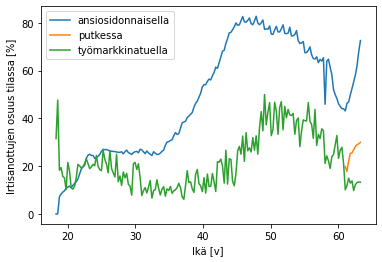

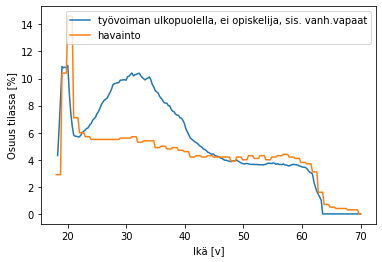

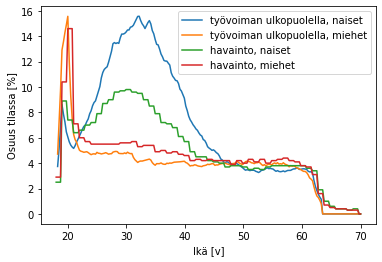

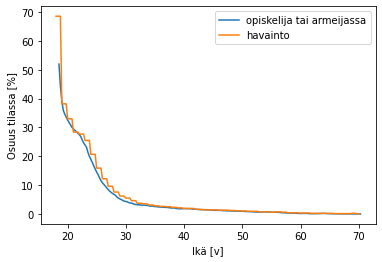

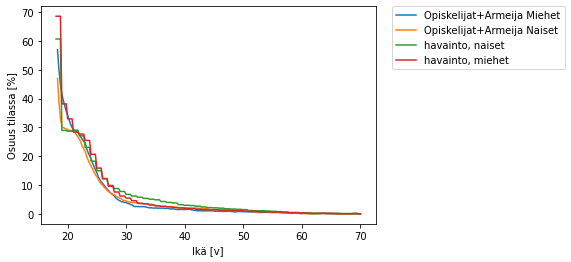

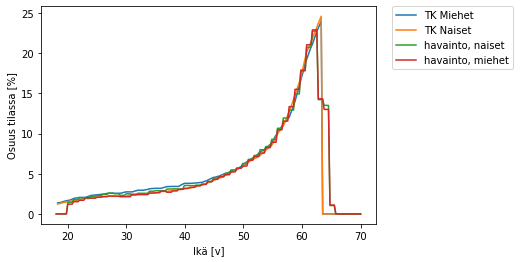

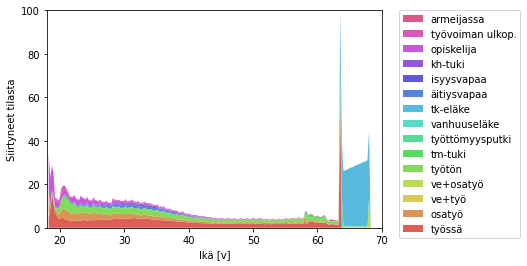

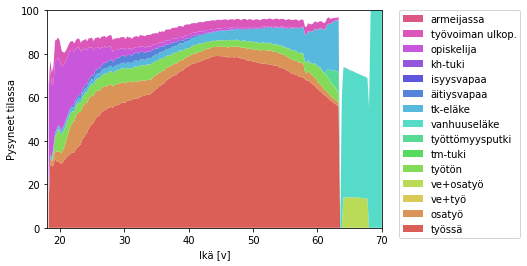

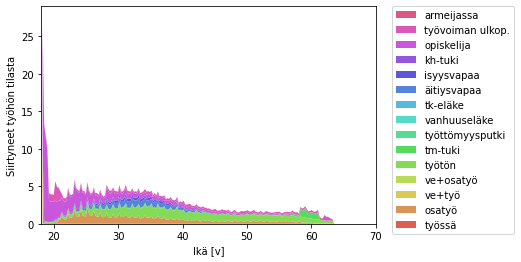

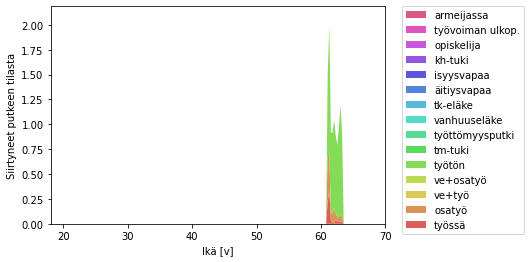

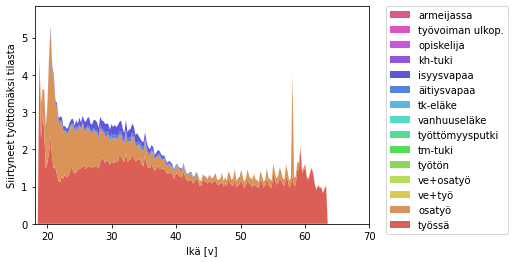

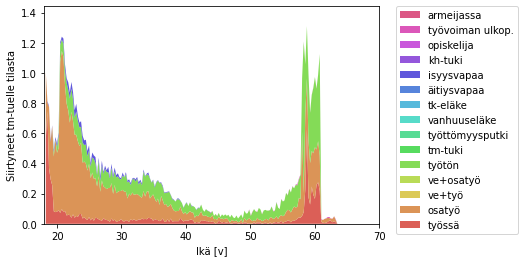

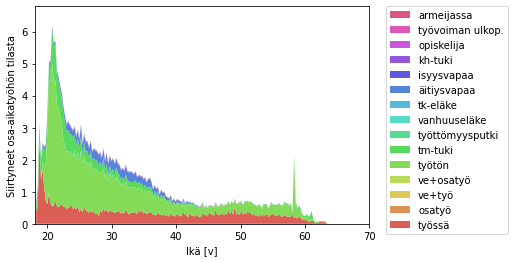

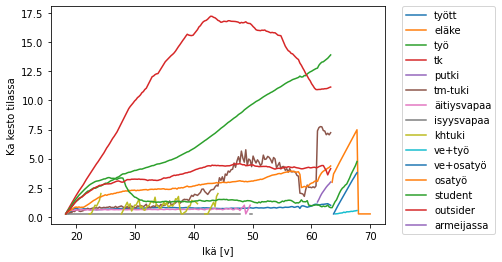

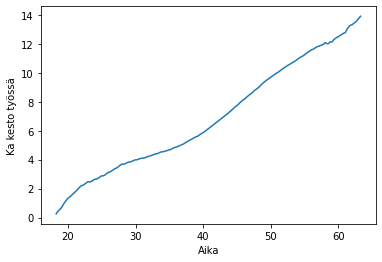

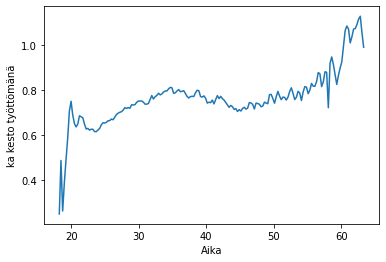

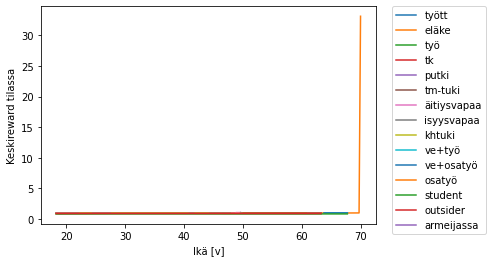

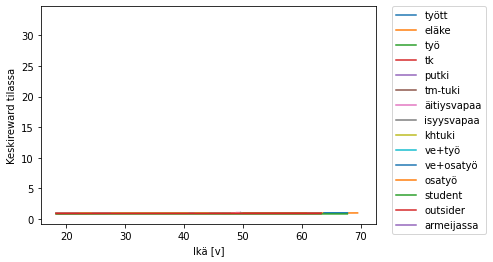

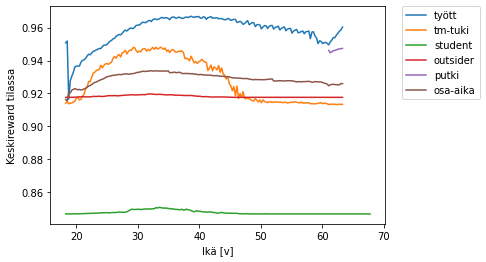

No handles with labels found to put in legend.


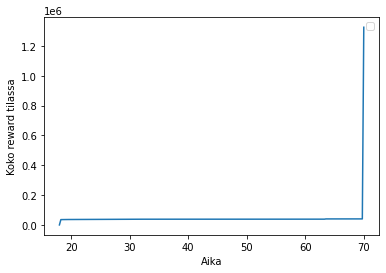

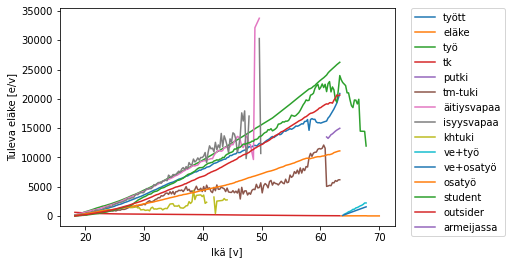

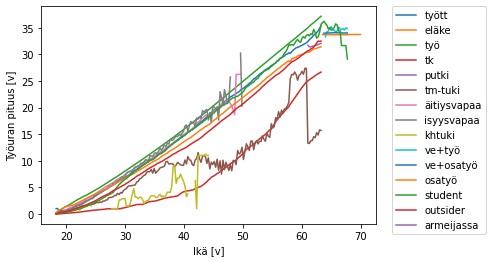

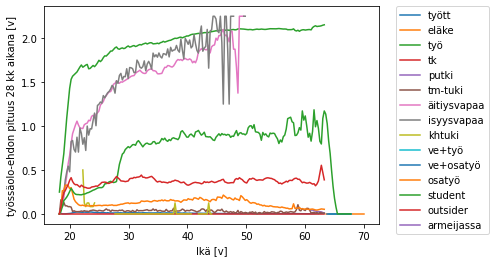

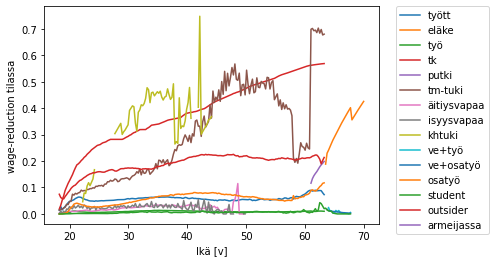

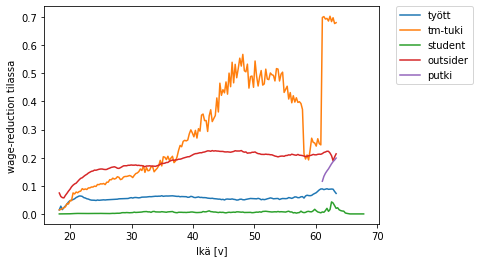

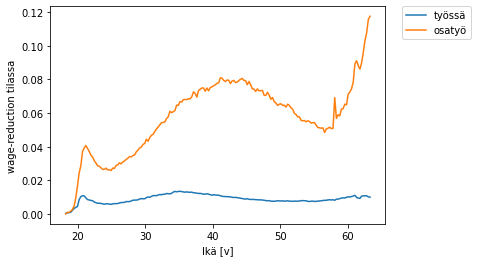

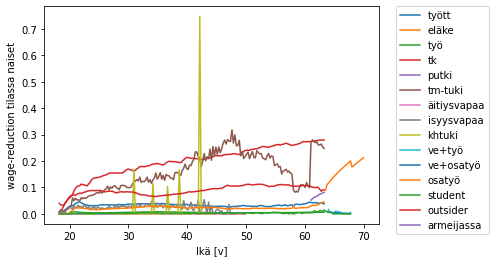

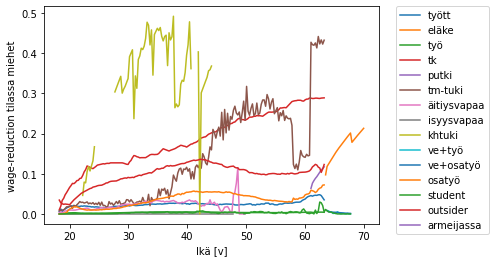

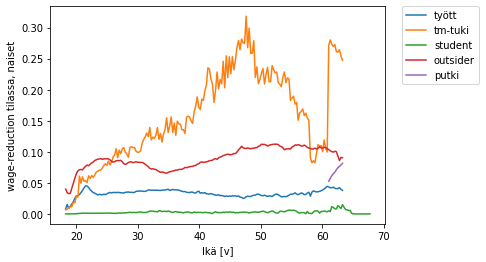

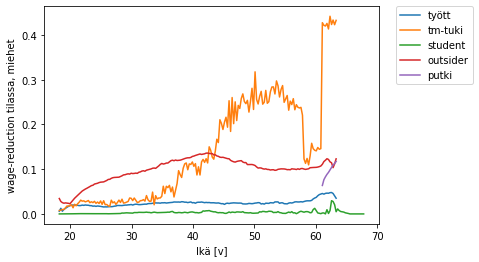

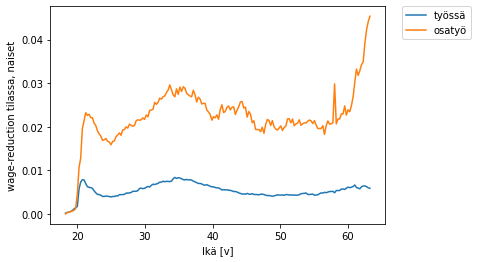

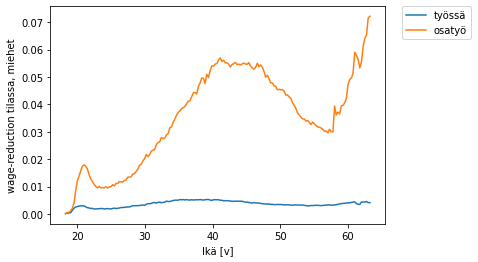

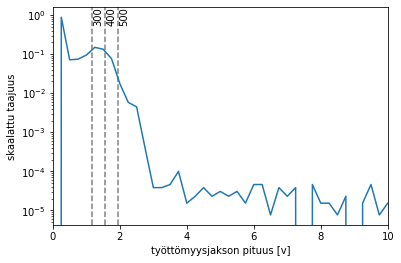

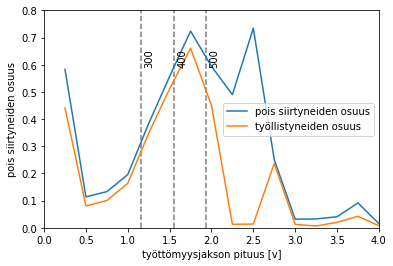

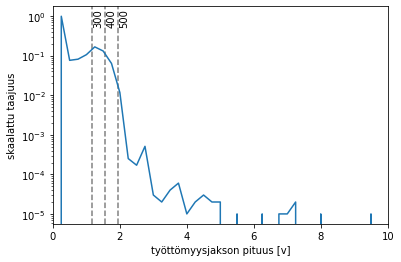

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


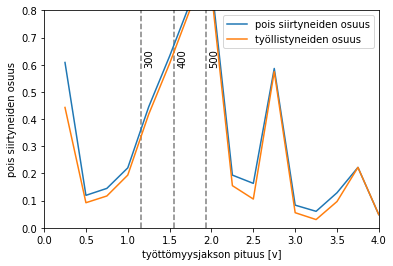

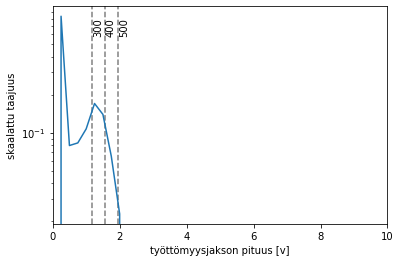

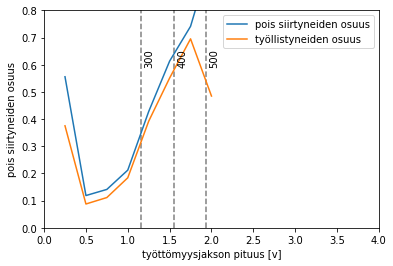

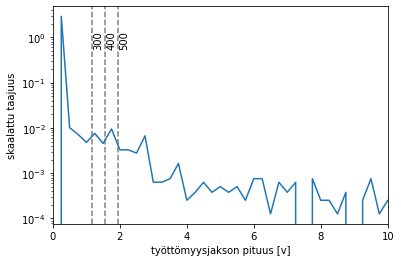

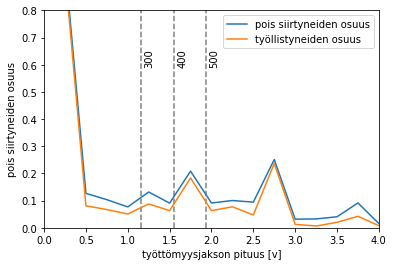

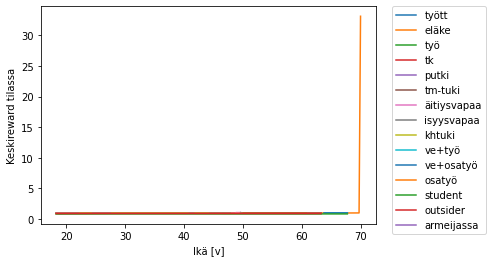

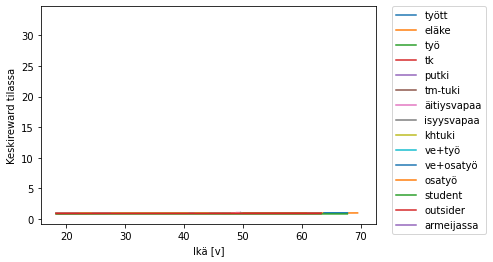

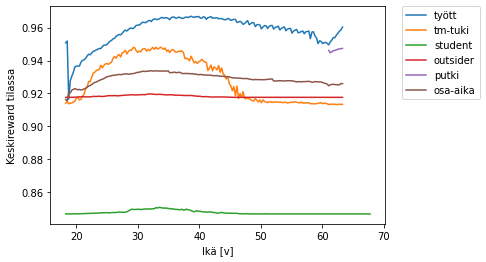

No handles with labels found to put in legend.


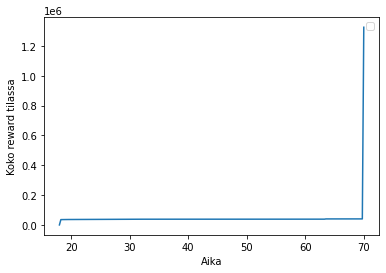

In [7]:
cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug,year=year)
cc1.render(load=perusresults,figname='v2_')

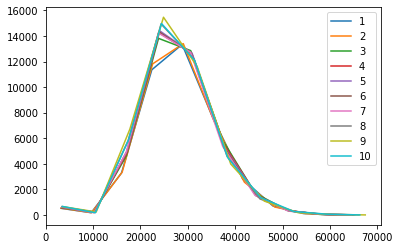

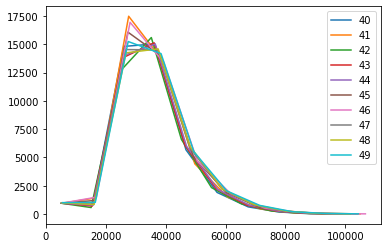

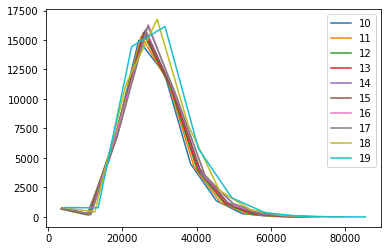

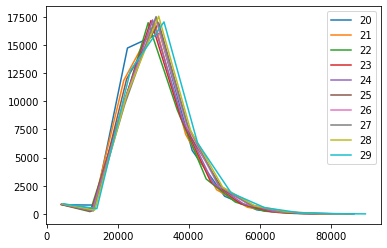

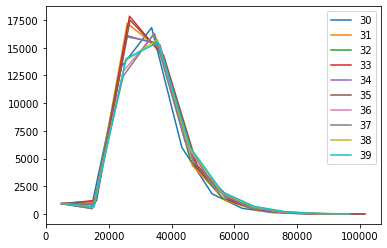

In [8]:
for t in set([1,10,20,30,40]):
    cc1.episodestats.plot_saldist(t)

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 18
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_kesto500 500
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True
perustulo False

sigma_reduction True
plotdebug False

version 2
n_pop 40000


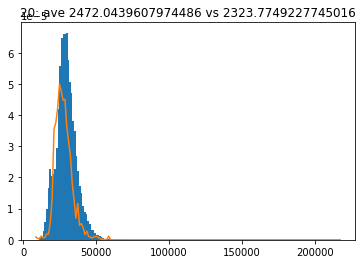

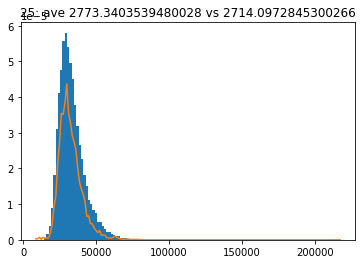

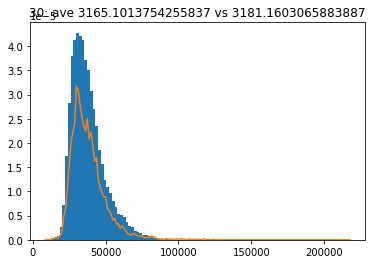

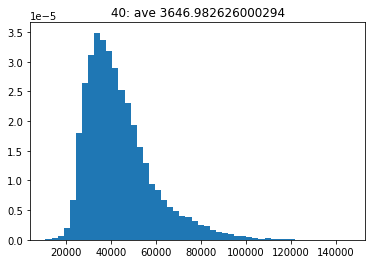

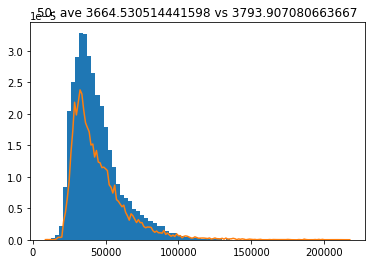

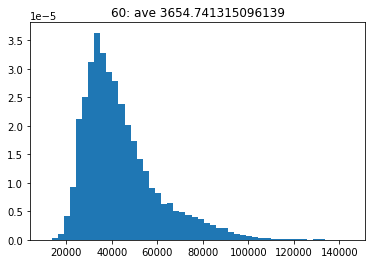

ValueError: x and y must have same first dimension, but have shapes (51,) and (53,)

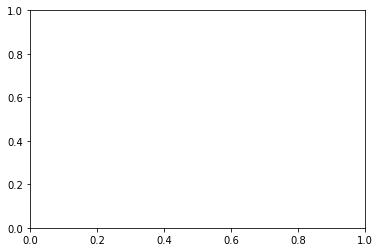

In [9]:
cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug)
cc1.load_sim(perusresults)
cc1.episodestats.test_salaries()

In [ ]:
#cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
#              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug)
#
#cc1.env.unit_test_code_decode()

# IRR

In [ ]:
if True:
    cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
                  randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug)
    cc1.load_sim(perusresults)
    cc1.episodestats.plot_irr(figname='kela')

In [ ]:
#cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
#              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug)
#cc1.env.test_comp_npv()

# test

In [ ]:
#cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
#              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug)
#cc1.load_sim(perusresults)
#cc1.episodestats.get_vanhempainvapaat()
#cc1.episodestats.get_vanhempainvapaat_md()

In [ ]:
cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug)
cc1.load_sim(perusresults)
cc1.episodestats.plot_emp_by_gender()